In [2]:
import pandas as pd
import numpy as np
import random
from datetime import datetime as dt
import gzip
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
n = 40428967  #total number of records in the clickstream data 
sample_size = 1000000
skip_values = sorted(random.sample(range(1,n), n-sample_size)) 

types_train = {
    'id': np.dtype(int),
    'click': np.dtype(int),
    'hour': np.dtype(int),
    'C1': np.dtype(int),
    'banner_pos': np.dtype(int),
    'site_id': np.dtype(str),
    'site_domain': np.dtype(str), 
    'site_category': np.dtype(str),
    'app_id': np.dtype(str),
    'app_domain': np.dtype(str),
    'app_category': np.dtype(str),
    'device_id': np.dtype(str),
    'device_ip': np.dtype(str),
    'device_model': np.dtype(str),
    'device_type': np.dtype(int),
    'device_conn_type': np.dtype(int),
    'C14': np.dtype(int),
    'C15': np.dtype(int),
    'C16': np.dtype(int),
    'C17': np.dtype(int),
    'C18': np.dtype(int),
    'C19': np.dtype(int),
    'C20': np.dtype(int),
    'C21':np.dtype(int)
}

types_test = {
    'id': np.dtype(int),
    'hour': np.dtype(int),
    'C1': np.dtype(int),
    'banner_pos': np.dtype(int),
    'site_id': np.dtype(str),
    'site_domain': np.dtype(str), 
    'site_category': np.dtype(str),
    'app_id': np.dtype(str),
    'app_domain': np.dtype(str),
    'app_category': np.dtype(str),
    'device_id': np.dtype(str),
    'device_ip': np.dtype(str),
    'device_model': np.dtype(str),
    'device_type': np.dtype(int),
    'device_conn_type': np.dtype(int),
    'C14': np.dtype(int),
    'C15': np.dtype(int),
    'C16': np.dtype(int),
    'C17': np.dtype(int),
    'C18': np.dtype(int),
    'C19': np.dtype(int),
    'C20': np.dtype(int),
    'C21':np.dtype(int)
}

In [5]:
parse_date = lambda val : dt.datetime.strptime(val, '%y%m%d%H')

with gzip.open("train.gz") as f:
    train = pd.read_csv(f, parse_dates = ['hour'], date_parser = parse_date, dtype=types_train, skiprows = skip_values)

train.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,10004181428767727519,0,2014-10-21,1005,1,0c2fe9d6,27e3c518,28905ebd,ecad2386,7801e8d9,...,1,0,6558,320,50,571,2,39,-1,32
1,10009910814812262951,1,2014-10-21,1005,0,85f751fd,c4e18dd6,50e219e0,a079ef6b,2347f47a,...,1,2,18993,320,50,2161,0,35,100131,157
2,10018076683759767024,1,2014-10-21,1002,0,84c7ba46,c4e18dd6,50e219e0,ecad2386,7801e8d9,...,0,0,21300,320,50,2446,3,171,100228,156
3,10020605367282200605,0,2014-10-21,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,...,1,0,20359,216,36,2333,0,39,-1,157
4,1002186989067144726,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15708,320,50,1722,0,35,100084,79


In [6]:
train.shape

(1000000, 24)

In [7]:
train.dtypes

id                          uint64
click                        int64
hour                datetime64[ns]
C1                           int64
banner_pos                   int64
site_id                     object
site_domain                 object
site_category               object
app_id                      object
app_domain                  object
app_category                object
device_id                   object
device_ip                   object
device_model                object
device_type                  int64
device_conn_type             int64
C14                          int64
C15                          int64
C16                          int64
C17                          int64
C18                          int64
C19                          int64
C20                          int64
C21                          int64
dtype: object

Target feature -> click

site features -> site_id, site_domain, site_category

app feature -> app_id, app_domain, app_category

device feature -> device_id, device_ip, device_model, device_type, device_conn_type

anonymized categorical features -> C14-C21

In [8]:
train['click'].value_counts()

0    829969
1    170031
Name: click, dtype: int64

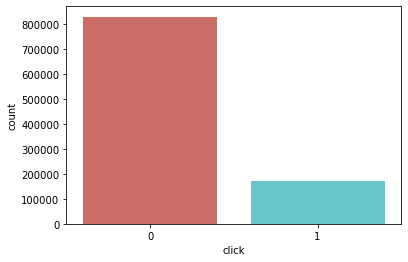

In [9]:
sns.countplot(x='click', data= train,palette='hls')
plt.show()

In [10]:
train['click'].value_counts()/len(train)

0    0.829969
1    0.170031
Name: click, dtype: float64

In [13]:
train.hour.describe()

/Users/raam/opt/anaconda3/envs/lifeofpy/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                 1000000
unique                    240
top       2014-10-22 09:00:00
freq                    11144
first     2014-10-21 00:00:00
last      2014-10-30 23:00:00
Name: hour, dtype: object

### The data covers 10days of click streams from 21-10-2014 to 30-10-2014 that is 240 hours


Text(0.5, 0, 'Number of clicks by hour')

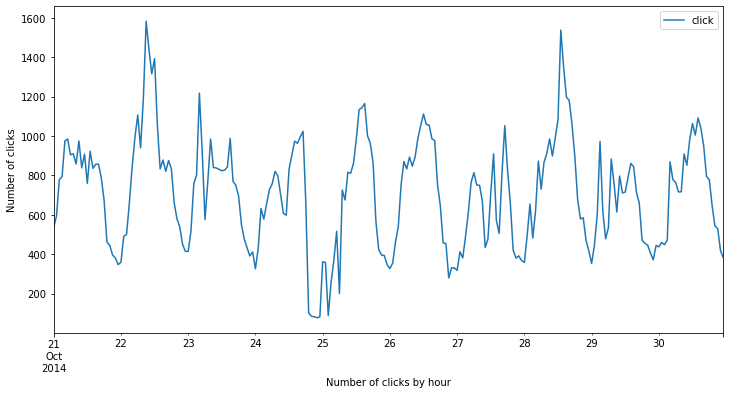

In [14]:
train.groupby('hour').agg({'click':'sum'}).plot(figsize=(12,6))
plt.ylabel('Number of clicks')
plt.xlabel('Number of clicks by hour')

The hourly clicks pattern looks pretty similar every day. However, there were a couple of peak hours, one is sometime in the mid of the day on Oct 22, and another is sometime in the mid of the day on Oct 28. And one off-peak hour is close to mid-night on Oct 24.

Feature engineering for date time features

 Extract hour from date time features. 

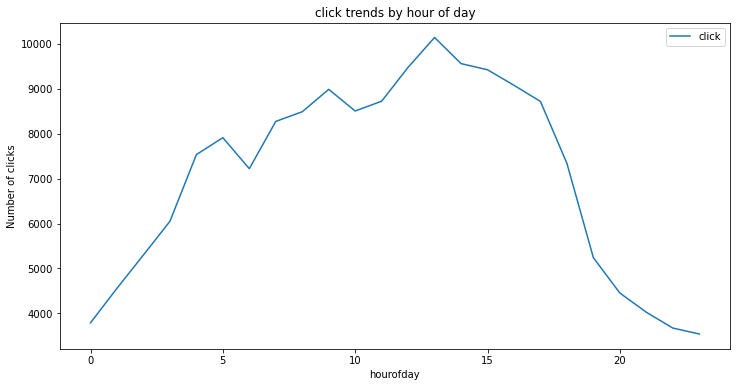

In [15]:
train['hourofday'] = train.hour.apply(lambda x: x.hour)
train.groupby('hourofday').agg({'click':'sum'}).plot(figsize=(12,6))
plt.ylabel('Number of clicks')
plt.title('click trends by hour of day');

In general, the highest number of clicks is at hour 13 and 14 (1pm and 2pm), and the least number of clicks is at hour 0 (mid-night). It seems a useful feature for roughly estimation.

In [16]:
train.head(4)

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,hourofday
0,10004181428767727519,0,2014-10-21,1005,1,0c2fe9d6,27e3c518,28905ebd,ecad2386,7801e8d9,...,0,6558,320,50,571,2,39,-1,32,0
1,10009910814812262951,1,2014-10-21,1005,0,85f751fd,c4e18dd6,50e219e0,a079ef6b,2347f47a,...,2,18993,320,50,2161,0,35,100131,157,0
2,10018076683759767024,1,2014-10-21,1002,0,84c7ba46,c4e18dd6,50e219e0,ecad2386,7801e8d9,...,0,21300,320,50,2446,3,171,100228,156,0
3,10020605367282200605,0,2014-10-21,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,...,0,20359,216,36,2333,0,39,-1,157,0


In [17]:
train.columns

Index(['id', 'click', 'hour', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'hourofday'],
      dtype='object')

Text(0.5, 0, 'Hourly impression vs click')

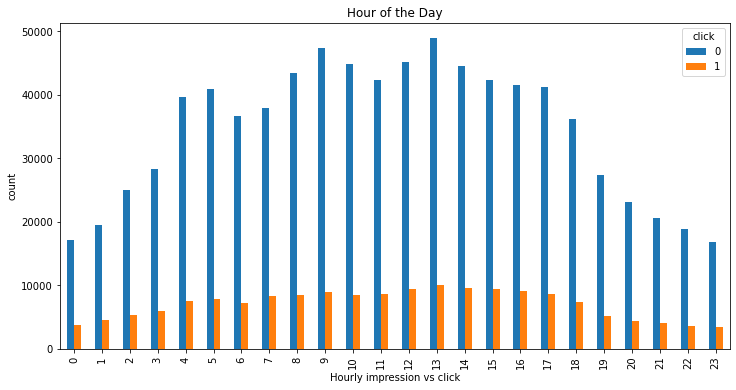

In [18]:
train.groupby(['hourofday', 'click']).size().unstack().plot(kind='bar', title='Hour of the Day',figsize=(12,6))
plt.ylabel('count')
plt.xlabel('Hourly impression vs click')

In [19]:
train.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,hourofday
0,10004181428767727519,0,2014-10-21,1005,1,0c2fe9d6,27e3c518,28905ebd,ecad2386,7801e8d9,...,0,6558,320,50,571,2,39,-1,32,0
1,10009910814812262951,1,2014-10-21,1005,0,85f751fd,c4e18dd6,50e219e0,a079ef6b,2347f47a,...,2,18993,320,50,2161,0,35,100131,157,0
2,10018076683759767024,1,2014-10-21,1002,0,84c7ba46,c4e18dd6,50e219e0,ecad2386,7801e8d9,...,0,21300,320,50,2446,3,171,100228,156,0
3,10020605367282200605,0,2014-10-21,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,...,0,20359,216,36,2333,0,39,-1,157,0
4,1002186989067144726,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,0,15708,320,50,1722,0,35,100084,79,0


Hourly CTR

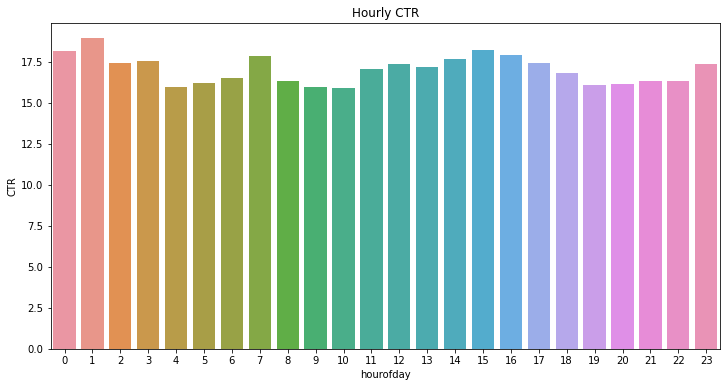

In [20]:
df_click = train[train['click'] == 1]
df_hour = train[['hourofday','click']].groupby(['hourofday']).count().reset_index()
df_hour = df_hour.rename(columns={'click': 'impressions'})
df_hour['clicks'] = df_click[['hourofday','click']].groupby(['hourofday']).count().reset_index()['click']
df_hour['CTR'] = df_hour['clicks']/df_hour['impressions']*100

plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='hourofday', data=df_hour)
plt.title('Hourly CTR');

One of the interesting observations here is that the highest CTR happened in the hour of mid-night, 1, 7 and 15. If you remember, around mid-night has the least number of impressions and clicks.

Day of the Week

In [24]:
train.columns

Index(['id', 'click', 'hour', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'hourofday',
       'day_of_week'],
      dtype='object')

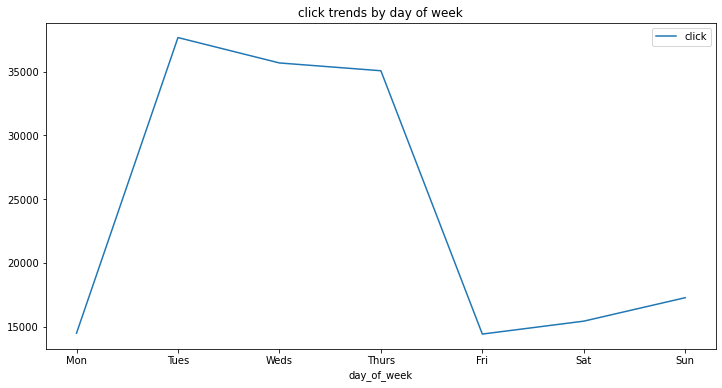

In [27]:
train['day_of_week'] = train['hour'].apply(lambda val: val.day_name())
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
train.groupby('day_of_week').agg({'click':'sum'}).reindex(cats).plot(figsize=(12,6))
ticks = list(range(0, 7, 1)) # points on the x axis where you want the label to appear
labels = "Mon Tues Weds Thurs Fri Sat Sun".split()
plt.xticks(ticks, labels)
plt.title('click trends by day of week');

# C1 feature 

In [28]:
print(train.C1.value_counts()/len(train))

1005    0.918189
1002    0.055034
1010    0.022700
1012    0.002787
1007    0.000920
1001    0.000223
1008    0.000147
Name: C1, dtype: float64


### C1 is anonymized catergorical value. Although in the datafile it is not mentioned what it represents we still going ahead with data exploration

##### C1 value = 1005 has the most data, almost 92%. Let's see whether we can find value of C1 indicates something about CTR.

In [29]:
C1_values = train.C1.unique()
C1_values.sort()
ctr_avg_list=[]
for i in C1_values:
    ctr_avg=train.loc[np.where((train.C1 == i))].click.mean()
    ctr_avg_list.append(ctr_avg)
    print("for C1 value: {},  click through rate: {}".format(i,ctr_avg))

for C1 value: 1001,  click through rate: 0.03139013452914798
for C1 value: 1002,  click through rate: 0.2078169858632845
for C1 value: 1005,  click through rate: 0.16983540425772908
for C1 value: 1007,  click through rate: 0.02608695652173913
for C1 value: 1008,  click through rate: 0.10204081632653061
for C1 value: 1010,  click through rate: 0.09400881057268723
for C1 value: 1012,  click through rate: 0.16971654108360243


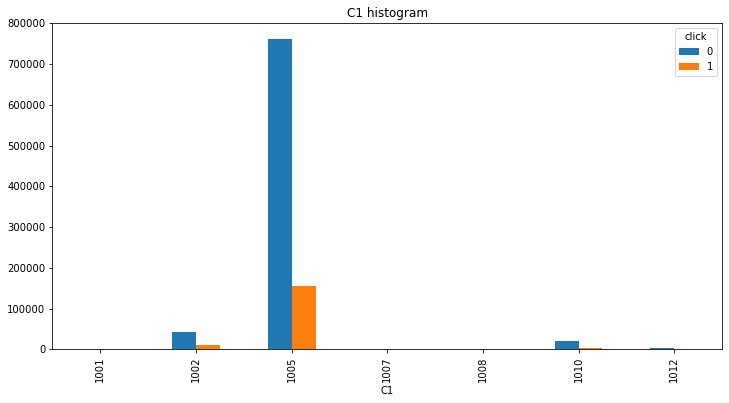

In [30]:
train.groupby(['C1', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='C1 histogram');

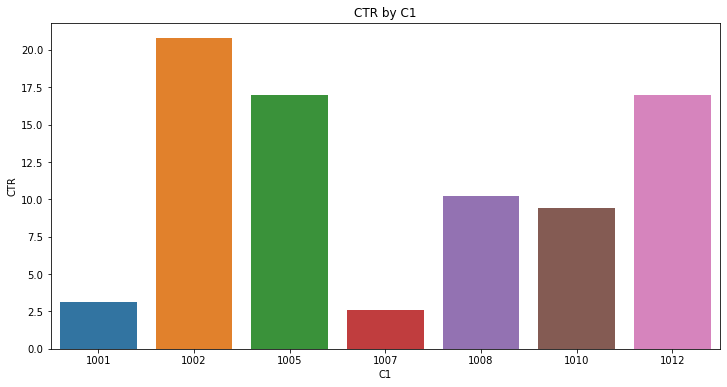

In [31]:
df_c1 = train[['C1','click']].groupby(['C1']).count().reset_index()
df_c1 = df_c1.rename(columns={'click': 'impressions'})
df_c1['clicks'] = df_click[['C1','click']].groupby(['C1']).count().reset_index()['click']
df_c1['CTR'] = df_c1['clicks']/df_c1['impressions']*100

plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='C1', data=df_c1)
plt.title('CTR by C1');

In [32]:
train['click'].mean()


0.170031

## Average CTR in the data is found to be .17

In [33]:
df_c1.CTR.describe()


count     7.000000
mean     11.441366
std       7.084974
min       2.608696
25%       6.269947
50%      10.204082
75%      16.977597
max      20.781699
Name: CTR, dtype: float64

### The important C1 values and CTR pairs are:

1005: 92% of the data and 0.17 CTR

1002: 5.5% of the data and 0.21 CTR

1010: 2.3% of the data and 0.096 CTR

1002 has a much higher than average CTR, and 1010 has a much lower than average CTR, it seems these two C1 values are important for predicting CTR.

## Banner Position

In [34]:
print(train.banner_pos.value_counts()/len(train))

0    0.719955
1    0.278234
7    0.001107
2    0.000339
4    0.000177
5    0.000147
3    0.000041
Name: banner_pos, dtype: float64


In [35]:
banner_pos = train.banner_pos.unique()
banner_pos.sort()
ctr_avg_list=[]
for i in banner_pos:
    ctr_avg=train.loc[np.where((train.banner_pos == i))].click.mean()
    ctr_avg_list.append(ctr_avg)
    print("for banner position: {},  click through rate: {}".format(i,ctr_avg))

for banner position: 0,  click through rate: 0.164524171649617
for banner position: 1,  click through rate: 0.1838093115866501
for banner position: 2,  click through rate: 0.12684365781710916
for banner position: 3,  click through rate: 0.17073170731707318
for banner position: 4,  click through rate: 0.1638418079096045
for banner position: 5,  click through rate: 0.10204081632653061
for banner position: 7,  click through rate: 0.3116531165311653


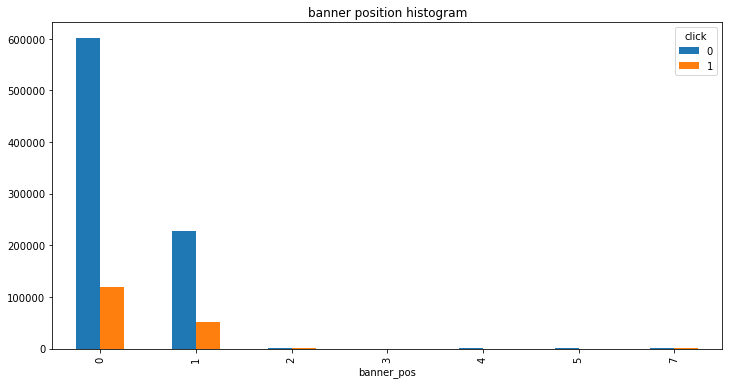

In [36]:
train.groupby(['banner_pos', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='banner position histogram');

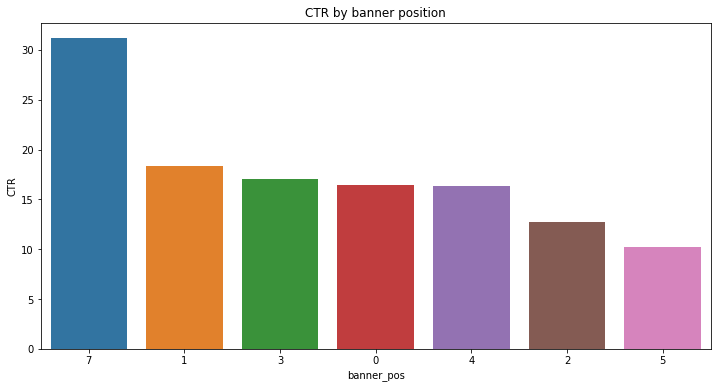

In [37]:
df_banner = train[['banner_pos','click']].groupby(['banner_pos']).count().reset_index()
df_banner = df_banner.rename(columns={'click': 'impressions'})
df_banner['clicks'] = df_click[['banner_pos','click']].groupby(['banner_pos']).count().reset_index()['click']
df_banner['CTR'] = df_banner['clicks']/df_banner['impressions']*100
sort_banners = df_banner.sort_values(by='CTR',ascending=False)['banner_pos'].tolist()
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='banner_pos', data=df_banner, order=sort_banners)
plt.title('CTR by banner position');

In [38]:
df_banner.CTR.describe()

count     7.000000
mean     17.477780
std       6.664067
min      10.204082
25%      14.534273
50%      16.452417
75%      17.727051
max      31.165312
Name: CTR, dtype: float64

## Device Features

In [39]:
print("There are {} devices in the data set".format(train.device_id.nunique()))


There are 150847 devices in the data set


In [40]:
print('The top 10 devices that have the most impressions')
print((train.device_id.value_counts()/len(train))[0:10])

The top 10 devices that have the most impressions
a99f214a    0.824461
0f7c61dc    0.000513
c357dbff    0.000462
936e92fb    0.000346
afeffc18    0.000231
28dc8687    0.000105
987552d1    0.000103
b09da1c4    0.000097
d857ffbb    0.000094
cef4c8cc    0.000088
Name: device_id, dtype: float64


In [41]:
top10_devices = (train.device_id.value_counts()/len(train))[0:10].index
click_avg_list=[]

for i in top10_devices:
    click_avg=train.loc[np.where((train.device_id == i))].click.mean()
    click_avg_list.append(click_avg)
    print("for device id value: {},  click through rate: {}".format(i,click_avg))

for device id value: a99f214a,  click through rate: 0.1745867906426138
for device id value: 0f7c61dc,  click through rate: 0.7641325536062378
for device id value: c357dbff,  click through rate: 0.6753246753246753
for device id value: 936e92fb,  click through rate: 0.07514450867052024
for device id value: afeffc18,  click through rate: 0.23376623376623376
for device id value: 28dc8687,  click through rate: 0.0
for device id value: 987552d1,  click through rate: 0.0
for device id value: b09da1c4,  click through rate: 0.10309278350515463
for device id value: d857ffbb,  click through rate: 0.24468085106382978
for device id value: cef4c8cc,  click through rate: 0.17045454545454544


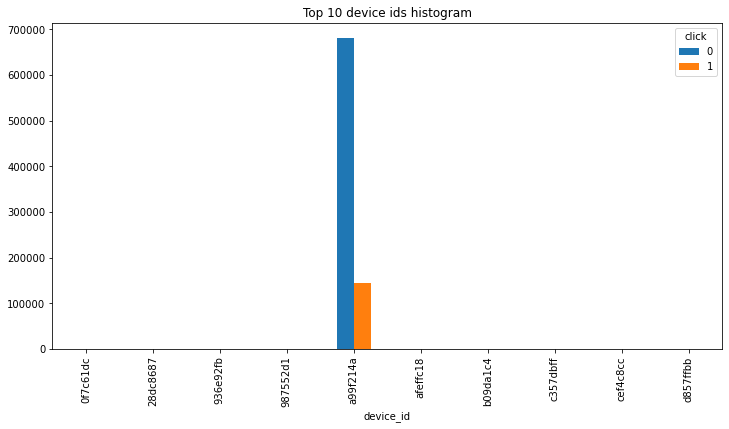

In [42]:
top10_device = train[(train.device_id.isin((train.device_id.value_counts()/len(train))[0:10].index))]
top10_device_click = top10_device[top10_device['click'] == 1]
top10_device.groupby(['device_id', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='Top 10 device ids histogram');

In [43]:
def convert_obj_to_int(self):
    
    object_list_columns = self.columns
    object_list_dtypes = self.dtypes
    new_col_suffix = '_int'
    for index in range(0,len(object_list_columns)):
        if object_list_dtypes[index] == object :
            self[object_list_columns[index]+new_col_suffix] = self[object_list_columns[index]].map( lambda  x: hash(x))
            self.drop([object_list_columns[index]],inplace=True,axis=1)
    return self
train = convert_obj_to_int(train)

In [44]:
train.head()

,id,click,hour,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,...,site_id_int,site_domain_int,site_category_int,app_id_int,app_domain_int,app_category_int,device_id_int,device_ip_int,device_model_int,day_of_week_int
0,10004181428767727519,0,2014-10-21,1005,1,1,0,6558,320,50,...,9015335939814036196,3987797209682390561,6521955550481143534,2331495519383451023,-8725416396792156491,1183775774039742789,5822178749571107829,-8116233842999623767,-2593881325240174795,-7064441439654559962
1,10009910814812262951,1,2014-10-21,1005,0,1,2,18993,320,50,...,-3752370708773709268,1784815621448035555,6802003689173095404,-100288304876729155,-3336630017128811856,-7299236860127461996,5822178749571107829,5812954839815410615,-5309985578609697865,-7064441439654559962
2,10018076683759767024,1,2014-10-21,1002,0,0,0,21300,320,50,...,-2705490785954009658,1784815621448035555,6802003689173095404,2331495519383451023,-8725416396792156491,1183775774039742789,3961895168726946523,8432837341991411039,-5702397765198378491,-7064441439654559962
3,10020605367282200605,0,2014-10-21,1005,1,1,0,20359,216,36,...,5565554844506714452,8311692147717529203,2293564838157539546,2331495519383451023,-8725416396792156491,1183775774039742789,5822178749571107829,-6267707347752107270,2509035161655354553,-7064441439654559962
4,1002186989067144726,0,2014-10-21,1005,0,1,0,15708,320,50,...,7929471190918853317,6275637940153573481,6521955550481143534,2331495519383451023,-8725416396792156491,1183775774039742789,5822178749571107829,3244115123699580107,3870880349505563213,-7064441439654559962
